In [1]:
import xml.etree.ElementTree as ET
import csv

def xml_to_csv(xml_file, csv_file):
    # it represent the xml structure in herachical format means structure format
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    # Open CSV file for writing
    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)
        
        # Write header
        csvwriter.writerow(['Date', 'sender', 'Message'])
        
        # Iterate through  all SMS elements in the xml data
        for sms in root.findall('.//sms'):
            date = sms.attrib.get('readable_date')
            sender = sms.attrib.get('address')
            message = sms.attrib.get('body')
            
            # Write row to CSV
            csvwriter.writerow([date, sender, message])


xml_file = 'smsdata1.xml'
csv_file = 'smsdata.csv'
xml_to_csv(xml_file, csv_file)
print("Conversion completed. CSV file saved as:", csv_file)

Conversion completed. CSV file saved as: smsdata.csv


In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv('smsdata.csv')
df

,Date,sender,Message
0,"Jul 13, 2020 5:30:26 PM",JX-JioPay,We have received recharge request for your Jio...
1,"Jul 13, 2020 5:32:26 PM",JM-JioPay,Recharge of Rs. 149.0 is successful for your J...
2,"Jul 13, 2020 5:42:34 PM",JZ-JioSvc,Registered email address for your Jio Number 9...
3,"Jul 13, 2020 6:24:20 PM",ATDSA,We are unable to process your request. Please ...
4,"Jul 13, 2020 6:36:21 PM",ATDSA,Your services have been set. Please restart yo...
...,...,...,...
4351,"Mar 3, 2024 9:53:57 PM",JZ-JioPay,90% daily data quota used as on 03-Mar-24 21:5...
4352,"Mar 3, 2024 11:00:59 PM",JZ-JIOPAY,100% of daily 1.50 GB data quota exhausted as ...
4353,"Mar 3, 2024 11:30:05 PM",CP-ONJPTR,Update! INR15.0 was credited to your Federal B...
4354,"Mar 3, 2024 11:33:17 PM",CP-ONJPTR,Update! INR10.0 was credited to your Federal B...


In [5]:
df.head(5)

,Date,sender,Message
0,"Jul 13, 2020 5:30:26 PM",JX-JioPay,We have received recharge request for your Jio...
1,"Jul 13, 2020 5:32:26 PM",JM-JioPay,Recharge of Rs. 149.0 is successful for your J...
2,"Jul 13, 2020 5:42:34 PM",JZ-JioSvc,Registered email address for your Jio Number 9...
3,"Jul 13, 2020 6:24:20 PM",ATDSA,We are unable to process your request. Please ...
4,"Jul 13, 2020 6:36:21 PM",ATDSA,Your services have been set. Please restart yo...


In [6]:
df.tail(5)

,Date,sender,Message
4351,"Mar 3, 2024 9:53:57 PM",JZ-JioPay,90% daily data quota used as on 03-Mar-24 21:5...
4352,"Mar 3, 2024 11:00:59 PM",JZ-JIOPAY,100% of daily 1.50 GB data quota exhausted as ...
4353,"Mar 3, 2024 11:30:05 PM",CP-ONJPTR,Update! INR15.0 was credited to your Federal B...
4354,"Mar 3, 2024 11:33:17 PM",CP-ONJPTR,Update! INR10.0 was credited to your Federal B...
4355,"Mar 4, 2024 11:05:29 AM",AX-SBIUPI,"Dear SBI UPI User, ur A/cX2502 credited by Rs4..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356 entries, 0 to 4355
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4356 non-null   object
 1   sender   4356 non-null   object
 2   Message  4356 non-null   object
dtypes: object(3)
memory usage: 102.2+ KB


In [8]:
df.isnull().sum()

Date       0
sender     0
Message    0
dtype: int64

In [9]:
df.shape

(4356, 3)

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(columns=['sender'], inplace=True)

In [14]:
df.head()

,Date,Message
0,"Jul 13, 2020 5:30:26 PM",We have received recharge request for your Jio...
1,"Jul 13, 2020 5:32:26 PM",Recharge of Rs. 149.0 is successful for your J...
2,"Jul 13, 2020 5:42:34 PM",Registered email address for your Jio Number 9...
3,"Jul 13, 2020 6:24:20 PM",We are unable to process your request. Please ...
4,"Jul 13, 2020 6:36:21 PM",Your services have been set. Please restart yo...


In [15]:
import re
# Regular expression pattern to match Marathi characters
marathi_pattern = re.compile(r'[\u0900-\u097F]+')# the regular expression pattern itself, 

# Identify rows containing Marathi text in the "Message" column
marathi_rows = df['Message'].str.contains(marathi_pattern)

# Drop rows containing Marathi text
df.drop(df[marathi_rows].index, inplace=True)

# Optionally can reset the index
df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(3673, 2)

In [17]:
df['Message'] = df['Message'].astype('string')
print(df['Message'].dtype)

string


In [18]:
def remove_special_and_integers(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

df['Message'] = df['Message'].apply(remove_special_and_integers)

df.head(5)

,Date,Message
0,"Jul 13, 2020 5:30:26 PM",We have received recharge request for your Jio...
1,"Jul 13, 2020 5:32:26 PM",Recharge of Rs is successful for your Jio num...
2,"Jul 13, 2020 5:42:34 PM",Registered email address for your Jio Number ...
3,"Jul 13, 2020 6:24:20 PM",We are unable to process your request Please r...
4,"Jul 13, 2020 6:36:21 PM",Your services have been set Please restart you...


In [19]:
# Define criteria for labeling messages as spam
df['Target'] ='not Spam'
not_spam_criteria = ['recharge', 'services', 'update','transaction','credited','debited',' Daily Data','expire','one time password','OTP',
                    'consumed','unreachable','Existing','successful','received']

# Label messages based on criteria
for index, row in df.iterrows():
    message = row['Message']
    if any(keyword in message.lower() for keyword in not_spam_criteria):
        df.at[index, 'Target'] = ' not spam' 
    else:
        df.at[index, 'Target'] ='Spam'


df.head(5)

,Date,Message,Target
0,"Jul 13, 2020 5:30:26 PM",We have received recharge request for your Jio...,not spam
1,"Jul 13, 2020 5:32:26 PM",Recharge of Rs is successful for your Jio num...,not spam
2,"Jul 13, 2020 5:42:34 PM",Registered email address for your Jio Number ...,Spam
3,"Jul 13, 2020 6:24:20 PM",We are unable to process your request Please r...,Spam
4,"Jul 13, 2020 6:36:21 PM",Your services have been set Please restart you...,not spam


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [21]:
df['Target']=encoder.fit_transform(df['Target']) #0 for not spam and #1 for spam
df.head(5)

,Date,Message,Target
0,"Jul 13, 2020 5:30:26 PM",We have received recharge request for your Jio...,0
1,"Jul 13, 2020 5:32:26 PM",Recharge of Rs is successful for your Jio num...,0
2,"Jul 13, 2020 5:42:34 PM",Registered email address for your Jio Number ...,1
3,"Jul 13, 2020 6:24:20 PM",We are unable to process your request Please r...,1
4,"Jul 13, 2020 6:36:21 PM",Your services have been set Please restart you...,0


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Siddhi\AppData\Local\Temp\ipykernel_17368\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [23]:
df.head()

,Date,Message,Target
0,2020-07-13 17:30:26,We have received recharge request for your Jio...,0
1,2020-07-13 17:32:26,Recharge of Rs is successful for your Jio num...,0
2,2020-07-13 17:42:34,Registered email address for your Jio Number ...,1
3,2020-07-13 18:24:20,We are unable to process your request Please r...,1
4,2020-07-13 18:36:21,Your services have been set Please restart you...,0


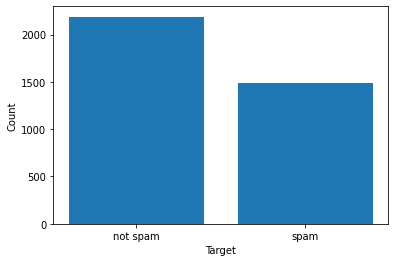

In [24]:
import matplotlib.pyplot as plt

counts = df['Target'].value_counts()
labels = ['not spam', 'spam']

plt.bar(labels, counts,width=0.8)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

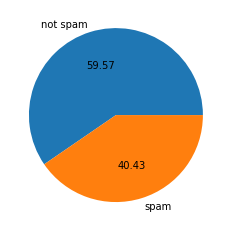

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [26]:
import nltk
from nltk.tokenize import word_tokenize
tokens = []
for message in df['Message']:
    tokens.extend(word_tokenize(message))
print(tokens) 

['We', 'have', 'received', 'recharge', 'request', 'for', 'your', 'Jio', 'connection', 'Transaction', 'ID', 'BRXAJ', 'Please', 'keep', 'this', 'transaction', 'ID', 'for', 'future', 'reference', 'Once', 'the', 'recharge', 'is', 'successful', 'you', 'will', 'receive', 'a', 'confirmation', 'message', 'To', 'check', 'recharge', 'status', 'click', 'httpswwwjiocomrechargehistory', 'or', 'dial', 'from', 'your', 'Jio', 'number', 'Recharge', 'of', 'Rs', 'is', 'successful', 'for', 'your', 'Jio', 'number', 'Entitlement', 'Benefits', 'UNLIMITED', 'CALLS', 'Jio', 'to', 'Jio', 'calls', 'Jio', 'to', 'NonJio', 'Mobile', 'Mins', 'UNLIMITED', 'DATA', 'GB', 'GBDay', 'SMSDay', 'Complimentary', 'Jio', 'Apps', 'Validity', 'days', 'Transaction', 'ID', 'BRXAJ', 'To', 'view', 'details', 'of', 'your', 'current', 'and', 'upcoming', 'plan', 'click', 'httptinyjiocomMyPlan', 'To', 'register', 'for', 'JioAutoPay', 'click', 'httpwwwjiocomjiopay', 'Dial', 'to', 'know', 'your', 'current', 'balance', 'validity', 'plan', 

In [27]:
from nltk.corpus import stopwords
stopword = stopwords.words("english")
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
removing_stopwords = [word for word in tokens if word not in stopword]
print(removing_stopwords)

['We', 'received', 'recharge', 'request', 'Jio', 'connection', 'Transaction', 'ID', 'BRXAJ', 'Please', 'keep', 'transaction', 'ID', 'future', 'reference', 'Once', 'recharge', 'successful', 'receive', 'confirmation', 'message', 'To', 'check', 'recharge', 'status', 'click', 'httpswwwjiocomrechargehistory', 'dial', 'Jio', 'number', 'Recharge', 'Rs', 'successful', 'Jio', 'number', 'Entitlement', 'Benefits', 'UNLIMITED', 'CALLS', 'Jio', 'Jio', 'calls', 'Jio', 'NonJio', 'Mobile', 'Mins', 'UNLIMITED', 'DATA', 'GB', 'GBDay', 'SMSDay', 'Complimentary', 'Jio', 'Apps', 'Validity', 'days', 'Transaction', 'ID', 'BRXAJ', 'To', 'view', 'details', 'current', 'upcoming', 'plan', 'click', 'httptinyjiocomMyPlan', 'To', 'register', 'JioAutoPay', 'click', 'httpwwwjiocomjiopay', 'Dial', 'know', 'current', 'balance', 'validity', 'plan', 'details', 'exciting', 'recharge', 'plans', 'Registered', 'email', 'address', 'Jio', 'Number', 'changed', 'mahapurkargmailcom', 'per', 'request', 'The', 'new', 'email', 'addr

In [29]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in removing_stopwords]
print(lemmatized)

['We', 'received', 'recharge', 'request', 'Jio', 'connection', 'Transaction', 'ID', 'BRXAJ', 'Please', 'keep', 'transaction', 'ID', 'future', 'reference', 'Once', 'recharge', 'successful', 'receive', 'confirmation', 'message', 'To', 'check', 'recharge', 'status', 'click', 'httpswwwjiocomrechargehistory', 'dial', 'Jio', 'number', 'Recharge', 'Rs', 'successful', 'Jio', 'number', 'Entitlement', 'Benefits', 'UNLIMITED', 'CALLS', 'Jio', 'Jio', 'call', 'Jio', 'NonJio', 'Mobile', 'Mins', 'UNLIMITED', 'DATA', 'GB', 'GBDay', 'SMSDay', 'Complimentary', 'Jio', 'Apps', 'Validity', 'day', 'Transaction', 'ID', 'BRXAJ', 'To', 'view', 'detail', 'current', 'upcoming', 'plan', 'click', 'httptinyjiocomMyPlan', 'To', 'register', 'JioAutoPay', 'click', 'httpwwwjiocomjiopay', 'Dial', 'know', 'current', 'balance', 'validity', 'plan', 'detail', 'exciting', 'recharge', 'plan', 'Registered', 'email', 'address', 'Jio', 'Number', 'changed', 'mahapurkargmailcom', 'per', 'request', 'The', 'new', 'email', 'address',

In [30]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
for i in df['Message']:
    words=nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(stemmer.stem(word))

we
receiv
recharg
request
jio
connect
transact
id
brxaj
pleas
keep
transact
id
futur
refer
onc
recharg
success
receiv
confirm
messag
to
check
recharg
statu
click
httpswwwjiocomrechargehistori
dial
jio
number
recharg
rs
success
jio
number
entitl
benefit
unlimit
call
jio
jio
call
jio
nonjio
mobil
min
unlimit
data
gb
gbday
smsday
complimentari
jio
app
valid
day
transact
id
brxaj
to
view
detail
current
upcom
plan
click
httptinyjiocommyplan
to
regist
jioautopay
click
httpwwwjiocomjiopay
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
regist
email
address
jio
number
chang
mahapurkargmailcom
per
request
the
new
email
address
jio
id
to
manag
account
myjio
app
click
httpswwwjiocomgetmyjio
we
unabl
process
request
pleas
retri
later
your
servic
set
pleas
restart
handset
thank
choos
airtel
we
set
servic
pleas
wait
dear
custom
thank
recharg
jio
number
kindli
click
wwwjiocomrlqhjicwq
share
recharg
experi
thank
team
jio
qfsqtlcjoa
googl
verifi
phone
devic
part
setup
learn
httpsgoogllhcs

current
balanc
valid
plan
detail
excit
recharg
plan
we
receiv
recharg
request
jio
connect
transact
id
pleas
keep
transact
id
futur
refer
onc
recharg
success
receiv
confirm
messag
to
check
recharg
statu
click
httpswwwjiocomrechargehistori
dial
jio
number
recharg
rs
success
jio
number
entitl
benefit
unlimit
call
jio
jio
call
jio
nonjio
mobil
min
unlimit
data
gb
gbday
smsday
complimentari
jio
app
valid
day
transact
id
to
view
detail
current
upcom
plan
click
httptinyjiocommyplan
to
share
recharg
experi
click
httpswwwjiocomeninjiorechexpsurveycustid
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
dear
custom
as
per
request
jiotun
song
chang
jio
number
charg
rs
to
deactiv
pleas
call
sm
stop
thankyou
team
jio
vigil
india
prosper
india
let
unit
fight
corrupt
inform
corrupt
relat
central
govt
cbi
acb
pune
hobacpunecbigovin
ph
acb
pune
cant
talk
can
call
later
import
inform
trai
provid
noc
instal
mobil
tower
if
fraudster
bring
fake
letter
inform
concern
servic
provid
local
polic
de

upto
rs
also
view
select
higher
gb
plan
view
plan
section
tca
click
httpsphonpejion
your
plan
jio
expir
avoid
stoppag
servicesrecharg
now
click
wwwjiocomroeosomhd
for
plan
call
your
plan
jio
expir
avoid
stoppag
servicesrecharg
now
click
wwwjiocomrogarexrvg
for
plan
call
your
current
plan
rs
gbday
jio
number
expir
feb
hr
after
current
plan
expiri
servic
stop
work
recharg
plan
to
recharg
click
httpswwwjiocomrechargesingleclickplanidutmsourceneutmmediumsmsutmcampaignpplanexpiri
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
recharg
jio
today
amazon
rs
plan
self
famili
get
daili
reward
upto
rs
also
view
select
higher
gb
plan
view
plan
section
tca
click
wwwamazoninjio
your
plan
rs
gbday
jio
number
expir
feb
hr
to
continu
enjoy
jio
servic
recharg
immedi
to
recharg
click
httpswwwjiocomrechargesingleclickplanidutmsourceneutmmediumsmsutmcampaignplanexpiri
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
recharg
rs
success
jio
number
entitl
benefit
unlimit
data
gb
gbd

smsday
complimentari
subscript
jio
app
valid
day
transact
id
ggp
to
view
detail
current
upcom
plan
click
httpswwwjiocomdlmyplan
to
share
recharg
experi
click
httpswwwjiocomeninjiorechexpsurveycustidggp
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
bewar
fraudul
messag
ask
call
number
updat
kyc
promis
free
mobil
data
do
not
call
number
click
link
given
messag
dont
share
person
detail
caller
unknownsuspici
number
stay
safe
team
jio
recharg
done
pmmrprsgst
payabl
companydistributorretailertransid
for
balanc
valid
tariff
best
recharg
dial
dear
custom
you
miss
call
the
last
miss
call
pm
may
thankyou
team
jio
jyoti
your
plan
jio
expir
avoid
stoppag
servicesrecharg
now
click
wwwjiocomrqdcuqnx
for
plan
call
your
plan
jio
expir
avoid
stoppag
servicesrecharg
now
click
wwwjiocomrqednmjt
for
plan
call
lectur
la
join
ho
rathod
sir
bolanar
aahet
your
plan
jio
expir
avoid
stoppag
servicesrecharg
now
click
wwwjiocomrqfdgoqb
for
plan
call
recharg
jio
today
phonep
rs
plan
stay
safe
stay


app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
while
receiv
intern
call
indian
number
number
display
phone
pleas
inform
dot
tollfre
number
daili
data
quota
use
aug
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
import
bewar
fraudul
messag
ask
call
number
verificationdownload
app
updat
kycaadhaar
detail
jio
never
ask
download
third
parti
app
activ
pleas
stay
alert
smscall
may
result
financi
loss
stay
safe
team
jio
daili
data
quota
use
aug
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
aug
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
aug
jio
number
daili
data


download
yono
sbi
use
sbi
atm
daili
data
quota
use
sep
jio
number
for
tip
manag
data
quota
effect
click
httpsyoutubezfudydctv
if
data
plan
internet
speed
reduc
consumpt
gb
to
continu
enjoy
high
speed
internet
click
httpswwwjiocomdldatavouch
recharg
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
you
recent
recharg
jio
no
pleas
click
wwwjiocomrgdqmx
share
feedback
recharg
experi
team
jio
daili
data
quota
use
sep
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
sep
jio
number
for
tip
manag
data
quota
effect
click
httpsyoutubezfudydctv
if
data
plan
internet
speed
reduc
consumpt
gb
to
continu
enjoy
high
speed
internet
click
httpswwwjiocomdldatavouch
recharg
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
sep
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dia

dear
custom
avail
take
call
your
plan
jio
expir
avoid
stoppag
servicesrecharg
now
click
wwwjiocomrhqzusoqpw
for
plan
call
daili
data
quota
use
nov
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
your
plan
jio
expir
avoid
stoppag
servicesrecharg
now
click
wwwjiocomrhqhfrvb
for
plan
call
your
current
plan
rs
gbday
jio
number
expir
nov
hr
after
current
plan
expiri
servic
stop
work
recharg
plan
to
recharg
click
httpswwwjiocomrechargesingleclickplanidutmsourceneutmmediumsmsutmcampaignpplanexpiri
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
your
plan
rs
gbday
jio
number
expir
nov
hr
to
continu
enjoy
jio
servic
recharg
immedi
to
recharg
click
httpswwwjiocomrechargesingleclickplanidutmsourceneutmmediumsmsutmcampaignplanexpiri
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
recharg
rs
success
jio
number
entitl
benefit
unlimit
data
gb
gbday
unlimit
voic

myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
deliv
ikigai
th
psycholog
flipkartcom
deliv
mohsin
bagwan
click
give
feedback
httpekrtintciuqdnnnn
daili
data
quota
use
dec
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
hi
airtel
pack
rs
expir
soon
use
remain
balanc
els
laps
to
recharg
comfort
home
use
airtel
thank
app
click
uairtelinda
daili
data
quota
use
jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujv

upi
tca
click
httpsphonpejion
plan
expir
recharg
jio
today
phonep
rs
plan
data
gbday
voic
unlimit
valid
day
get
reward
upto
rs
first
recharg
self
famili
pay
via
upi
tca
click
httpsphonpejion
plan
expir
recharg
now
jio
amazon
rs
plan
data
gbday
voic
unlimitedvalid
daysexist
user
get
upto
rs
daili
reward
new
user
get
upto
rs
cashbacktca
click
httpsamazoninjio
importantbewar
fraudul
messag
ask
call
number
verificationdownload
app
updat
kycaadhaar
detail
jio
never
ask
download
third
parti
app
activ
pleas
stay
alert
smscall
may
result
financi
loss
stay
safe
team
jio
you
miss
call
last
call
can
i
call
back
later
plan
expir
recharg
jio
today
phonep
rs
plan
data
gbday
voic
unlimit
valid
day
get
reward
upto
rs
first
recharg
self
famili
pay
via
upi
tca
click
httpsphonpejion
recharg
jio
today
googl
pay
rs
plan
data
gbday
voic
unlimit
valid
day
stay
safe
stay
connect
do
recharg
self
famili
tca
click
httpsgpayappgooglmqglt
plan
expir
recharg
jio
today
phonep
rs
plan
data
gbday
voic
unlimit
valid
da

uairtelinapp
dear
student
schedul
det
test
lt
th
april
test
time
am
pm
test
credenti
share
next
sm
lt
construct
dear
student
kindli
note
follow
test
urlhttpdoapplntedutechcom
user
namemahapurkargmailcom
passwordtest
lt
construct
dear
student
schedul
det
test
lt
th
april
test
time
am
pm
test
credenti
share
next
sm
lt
construct
dear
jana
client
for
busi
loan
person
loan
properti
loan
contact
plan
expir
recharg
phonep
get
reward
upto
rs
first
recharg
self
famili
recharg
jio
rs
plan
data
gbday
voic
unlimit
valid
day
tca
click
httpsphonpejion
plan
expir
recharg
now
amazon
exist
user
get
upto
rs
daili
reward
self
famili
upto
rs
cashback
new
user
recharg
jio
rs
plan
data
gbday
voic
unlimit
valid
day
tca
click
httpsamazoninjio
plan
expir
recharg
now
googl
pay
rs
plan
data
gbday
voic
unlimitedvalid
day
self
famili
tca
click
httpsgpayappgooglmqglt
hi
xxxxxnow
open
zero
balanc
save
account
mainten
fee
home
open
ac
httpkotkinfbj
tc
kbank
plan
expir
recharg
paytm
get
upto
rs
cashback
code
jio
time


block
upi
one
time
password
otp
log
jiotv
pleas
enter
otp
proceed
facebook
login
code
laznxcarlw
got
sm
bank
account
go
block
it
could
fraud
sm
be
alert
dont
click
link
call
maharashtra
state
cyber
depart
consumpt
traffick
drug
crimin
offenc
drug
injuri
health
say
no
drug
say
ye
life
issu
public
interest
ncb
india
shruti
supersav
deal
med
now
get
medicin
without
burn
save
deliv
within
hour
use
code
get
tnc
appli
order
httpsumngecorrn
team
phabl
articl
noucin
inland
speed
post
book
track
articl
wwwindiapostgovin
dont
let
rain
rain
parad
buy
beauti
essenti
myglamm
monsoon
deal
get
rs
off
order
rs
use
md
weurlcosmpakz
dear
mahapurkar
shruti
shrikantrao
aadhaar
inform
updat
you
download
updat
eaadhaar
eaadhaaruidaigovin
consumpt
traffick
drug
crimin
offenc
drug
injuri
health
say
no
drug
say
ye
life
issu
public
interest
ncb
india
your
aadhaar
pvc
card
srn
s
hand
india
post
deliveri
via
speed
post
track
awb
noucin
wwwindiapostgovin
data
quota
left
mb
you
left
mb
highspe
data
airtel
number
ar

sbi
user
ac
xdebit
rs
aug
transfer
mahapurkar
ref
no
if
done
u
fwd
sm
call
block
upi
sbi
got
messag
relativefriendcolleagu
ask
moneycoupon
could
fraud
alway
recheck
reconfirm
maharashtra
cyber
depart
dear
custom
your
citru
wallet
power
payu
expir
soon
complet
kyc
httpsconsumercitruspaycommigr
continu
wallet
benefit
pleas
ignor
complet
kyc
import
weve
activ
intern
onlin
usag
jupit
debit
card
to
manag
transact
set
visit
httpsappjupitermoneydebitcardtransactionset
import
weve
activ
domest
atm
usag
jupit
debit
card
to
manag
transact
set
visit
httpsappjupitermoneydebitcardtransactionset
weve
upgrad
jupit
physic
debit
card
that
mean
shop
store
withdraw
money
atm
visit
httpsappjupitermoneymainscreenreward
learn
excit
reward
get
shop
use
debit
card
import
weve
activ
domest
contactless
usag
jupit
debit
card
to
manag
transact
set
visit
httpsappjupitermoneydebitcardtransactionset
otp
valid
one
hour
till
one
transact
success
failur
feder
bank
for
internet
safeti
raho
do
kadam
aagey
never
click
unk

gain
get
upto
off
rs
cashback
hurri
expir
today
hyinmyl
alert
airtel
no
par
incom
sewa
nov
ko
band
ho
jayegi
aaj
hi
unlimit
pack
se
recharg
karein
iairtelinfdpnew
ignor
recharg
hurri
up
admiss
open
dypatil
universitypun
direct
nd
year
btech
in
csit
per
sem
commenc
academ
session
soon
dypu
entranc
fill
applic
call
dypuap
your
verif
code
seat
accept
cap
round
is
dear
dse
you
have
confirm
seat
accept
statu
cap
round
i
not
freez
dse
recharg
na
hone
ke
kaaran
ki
outgo
sewa
band
hai
sewa
shuru
karein
airtel
unlimit
pack
se
recharg
kark
iairtelinfdpnew
ignor
recharg
airtel
no
par
outgo
sewa
band
hai
sewa
dubara
shuru
karn
ke
liy
aaj
hi
unlimit
pack
se
recharg
karein
iairtelinfdpnew
ignor
recharg
recharg
na
hone
ke
kaaran
airtel
no
ki
outgo
sewa
band
hai
dubara
shuru
karn
ke
liy
recharg
karein
iairtelinfdpnew
ignor
recharg
airtel
no
par
outgo
sewa
band
hai
sewa
dubara
shuru
karn
ke
liy
aaj
hi
unlimit
pack
se
recharg
karein
iairtelinfdpnew
ignor
recharg
your
otp
meesho
login
valid
min
pleas
do


speed
internet
click
httpswwwjiocomdldatavouch
recharg
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
congralut
unlimit
call
gbday
along
smsday
credit
account
day
for
best
offer
call
hi
payment
rs
done
via
upi
airtel
prepaid
number
process
order
id
you
receiv
order
confirm
within
hr
pleas
keep
order
id
futur
refer
dear
sbi
user
ac
xdebit
rs
dec
transfer
bharti
airtel
ref
no
if
done
u
fwd
sm
call
block
upi
sbi
hi
your
prepaid
recharg
rs
success
order
id
pleas
keep
order
id
futur
refer
recharg
inr
success
airtel
mobil
transact
id
check
balanc
valid
tariff
best
recharg
airtel
thank
app
refer
friend
airtel
earn
rs
coupon
iairtelinref
pradip
shengd
sir
daili
gb
data
quota
exhaust
dec
jio
number
daili
high
speed
data
quota
restor
dec
to
know
consum
data
quota
click
httptinyjiocomhelpfultip
get
jiofib
work
home
truli
unlimit
internet
downlaod
speed
upload
speed
zero
entri
cost
no
secur
deposit
instal
charg
postpaid
plan
click
wwwjiocomruinywlg
to
get
jiofib
now
dear
sbi
user
ac

yhght
tnc
app
httplsktmec
dear
custom
rs
lenskart
credit
expir
nd
jan
get
latest
eyewear
code
yhght
tnc
app
httplsktmec
your
plan
jio
expir
avoid
stoppag
servicesrecharg
now
click
wwwjiocomrjciiau
for
plan
call
hurri
recharg
jio
amazon
exist
user
get
upto
rs
reward
self
familyupto
rs
cashback
new
user
recharg
rs
plan
moretca
click
httpsamazoninjio
daili
data
quota
use
dec
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
dear
sbi
user
ac
xdebit
rs
dec
transfer
miss
vaibhavi
ref
no
if
done
u
fwd
sm
call
block
upi
sbi
phonepesmsverifi
fcfbbccaebacddaaacffccf
verif
code
log
flipkart
account
do
not
share
code
anyon
includ
flipkart
deliveri
agent
dfyrqizhwd
daili
data
quota
use
jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubetchujvivi
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
hurri
recharg
jio
phonep
get
reward
upto

start
icici
bank
if
report
bank
do
share
card
detailsotpcvv
anyon
registr
googl
pay
app
start
do
share
card
detailsotpcvv
avoid
financi
loss
if
call
axi
bank
you
success
ad
ac
xx
googl
pay
upi
app
axi
bank
hdfc
bank
upi
payment
registr
googl
pay
app
begun
if
initi
pleas
report
immedi
bank
avoid
financi
loss
hdfc
bank
you
success
regist
upi
payment
googl
pay
if
pleas
report
immedi
bank
do
share
card
detailsotpatm
pin
anyon
dear
sbi
user
ac
xdebit
rs
jan
transfer
mr
payal
ref
no
if
done
u
fwd
sm
call
block
upi
sbi
dear
custom
cool
period
limit
rs
applic
first
hour
a
upi
pin
use
payment
money
get
deduct
upi
pin
use
never
share
upi
pin
cvv
otp
anyoneicici
bank
benefit
worth
rs
new
jiofib
entertain
bonanza
enjoy
ondemand
channel
ott
app
video
call
tv
highspe
internet
no
secur
deposit
box
instal
charg
plan
start
rs
month
postpaid
plan
click
wwwjiocomrvppgxh
get
jiofib
now
daili
data
quota
use
jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgflu

via
upi
airtel
prepaid
number
process
order
id
you
receiv
order
confirm
within
hr
pleas
keep
order
id
futur
refer
hi
your
prepaid
recharg
rs
success
order
id
pleas
keep
order
id
futur
refer
recharg
done
mrp
inr
gst
payabl
companydistributorretailertalktim
balinr
transid
check
balanc
valid
tariff
best
recharg
airtel
thank
app
would
like
refer
airtel
prepaid
friend
famili
save
rs
next
recharg
click
iairtelinref
you
enjoy
talktim
worth
rs
jiotun
servic
activ
jio
number
valid
till
mar
charg
rs
to
deactiv
pleas
call
sm
stop
open
myjio
app
jiotun
servic
activ
jio
number
valid
till
mar
charg
rs
to
deactiv
pleas
call
sm
stop
open
myjio
app
we
would
love
hear
feedback
experi
activ
jiotun
pleas
click
wwwjiocomrksnvneg
share
feedback
thank
you
team
jio
hurri
recharg
jio
googl
pay
rs
plan
data
gbday
voic
unlimit
valid
day
self
famili
tca
click
httpsgpayappgooglikubsd
your
plan
rs
mgbd
jio
number
expir
feb
hr
to
continu
enjoy
jio
servic
recharg
immedi
to
recharg
click
httpswwwjiocomselfcarerecharg


watch
india
vs
australia
rd
test
live
jiotv
httpsbitlysmsjiotv
dear
sbi
upi
user
ur
acx
credit
rs
mar
ref
hi
mahapurkar
credit
feder
bank
account
xxxx
jupit
app
mar
happi
bank
dear
custom
avail
take
call
daili
data
quota
use
mar
jio
number
for
tip
manag
data
quota
effect
click
httpsyoutubezfudydctv
if
data
plan
internet
speed
reduc
consumpt
gb
to
continu
enjoy
high
speed
internet
click
httpswwwjiocomdldatavouch
recharg
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
hi
payment
rs
done
via
upi
airtel
prepaid
number
process
order
id
you
receiv
order
confirm
within
hr
pleas
keep
order
id
futur
refer
recharg
done
mrp
inr
gst
payabl
companydistributorretailertalktim
balinr
transid
check
balanc
valid
tariff
best
recharg
airtel
thank
app
would
like
refer
airtel
prepaid
friend
famili
save
rs
next
rs
debit
ac
use
upi
vpa
airtelaxb
upi
ref
no
feder
bank
recharg
click
iairtelinref
you
enjoy
talktim
worth
rs
hi
your
prepaid
recharg
rs
success
order
id
pleas
keep
order
id
futur
refer


daili
data
quota
use
mar
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
dear
sbi
user
ac
xdebit
rs
mar
transfer
vidyanagari
ref
no
if
done
u
fwd
sm
call
block
upi
sbi
daili
data
quota
use
mar
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
mar
jio
number
for
tip
manag
data
quota
effect
click
httpsyoutubezfudydctv
if
data
plan
internet
speed
reduc
consumpt
gb
to
continu
enjoy
high
speed
internet
click
httpswwwjiocomdldatavouch
recharg
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
dear
sbi
user
ac
xdebit
rs
mar
transfer
bankar
vadewal
ref
no
if
done


block
upi
sbi
recharg
today
phonep
jio
rs
get
reward
upto
rs
first
recharg
pay
via
upi
tca
click
httpsphonpejiod
rs
debit
ac
use
upi
vpa
bharatp
fbpe
upi
ref
no
feder
bank
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
rs
debit
ac
use
upi
vpa
qybl
upi
ref
no
feder
bank
hi
saw
could
complet
recharg
you
tri
recharg
airtel
number
click
iairtelinrechargenow
plan
expir
recharg
amazon
stay
connectedexist
user
get
upto
rs
rewardsupto
rs
cashback
new
userrecharg
jio
rs
plan
moretca
click
httpsamzntoznzjz
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
recharg
today
phonep
jio
rs
get
reward
upto
rs
first
recharg
pay
via
upi
tca
click
httpsphonpejiod
alert
mobil
one
time
passwordotp
verif
sppu
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
alert
you
consum
daili
high
speed
data
limit
track
usag
buy
data
pack
airt

swiggi
order
complet
ani
amount
debit
upi
get
refund
within
day
daili
data
quota
use
apr
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
hi
mahapurkar
credit
feder
bank
account
xxxx
jupit
app
apr
happi
bank
rs
debit
ac
use
upi
vpa
ybl
upi
ref
no
feder
bank
rs
debit
ac
use
upi
vpa
qybl
upi
ref
no
feder
bank
hi
mahapurkar
credit
feder
bank
account
xxxx
jupit
app
apr
happi
bank
the
ceir
portal
facilit
mobil
phone
user
reportingblockingunblock
retriev
lost
stolen
mobil
phone
pleas
visit
httpswwwceirgovin
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
kuth
ahe
room
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
daili
data
quota
use
apr
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
dear
custom
extra
off
rs
lenskart
eyewear
order
code
qmrpiyg
ti

httpsphonpejiof
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
dear
sbi
user
ac
xdebit
rs
may
transfer
balwand
digvijay
ref
no
if
done
u
fwd
sm
call
block
upi
sbi
plan
expir
recharg
googl
pay
stay
connect
rs
plan
self
familytca
click
httpsgpayappgoogljvkvcd
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
alert
you
consum
daili
high
speed
data
limit
track
usag
buy
data
pack
airtel
thank
app
iairtelingetdata
recharg
today
phonep
jio
rs
get
reward
upto
rs
first
recharg
pay
via
upi
tca
click
httpsphonpejiof
rs
debit
ac
use
upi
vpa
qybl
upi
ref
no
feder
bank
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
plan
expir
recharg
amazon
stay
connectedexist
user
get
upto
rs
rewardsupto
rs
cashbac

happi
bank
rs
debit
ac
use
upi
vpa
billdeskrechargeicici
upi
ref
no
feder
bank
recharg
inr
success
airtel
mobil
transact
id
check
balanc
valid
tariff
best
recharg
airtel
thank
app
would
like
refer
airtel
prepaid
friend
famili
save
rs
next
recharg
click
iairtelinref
enjoy
unlimit
local
std
roam
call
network
daili
gb
sm
pack
valid
day
unlimit
g
data
plan
limit
claim
airtel
thank
appalso
get
free
wynk
music
hellotun
valid
per
current
pack
openwynkinhtlapu
congralut
unlimit
call
gbday
along
smsday
credit
account
day
for
best
offer
call
dear
sbi
upi
user
ur
acx
credit
rs
jun
ref
hi
mahapurkar
credit
feder
bank
account
xxxx
jupit
app
jun
happi
bank
alert
airtel
no
ki
calldata
servic
band
hai
sewa
shuru
karein
unlimit
pack
se
recharg
karein
iairtelinfdpnew
recharg
kia
toh
ignor
karein
recharg
today
phonep
jio
rs
get
reward
upto
rs
first
recharg
pay
via
upi
tca
click
httpsphonpejiof
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
rs
debit
ac
use
upi
vp

ke
kaaran
ki
outgo
sewa
band
hai
sewa
shuru
karein
airtel
unlimit
pack
se
recharg
karein
iairtelinfdpnew
ignor
recharg
recharg
inr
success
airtel
mobil
transact
id
check
balanc
valid
tariff
best
recharg
airtel
thank
app
would
like
refer
airtel
prepaid
friend
famili
save
rs
next
recharg
click
iairtelinref
enjoy
unlimit
local
std
roam
call
network
daili
gb
sm
pack
valid
day
unlimit
g
data
plan
limit
claim
airtel
thank
appalso
get
free
wynk
music
hellotun
valid
per
current
pack
openwynkinhtlapu
congralut
unlimit
call
gbday
along
smsday
credit
account
day
for
best
offer
call
your
jio
plan
expir
soon
recharg
new
all
in
one
plan
rs
unlimit
jio
call
gb
high
speed
dataday
day
click
wwwjiocomrwqbuipm
recharg
tc
appli
for
plan
call
airtel
no
par
outgo
sewa
band
hai
sewa
dubara
shuru
karn
ke
liy
aaj
hi
unlimit
pack
se
recharg
karein
iairtelinfdpnew
ignor
recharg
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
your
jio
plan
ex

via
upi
tca
click
httpsphonpejiof
your
amazonin
gift
card
end
balanc
rs
expir
kindli
redeem
outstand
balanc
expiri
gift
card
ref
wwwamazoningiftcardtnc
tc
team
qwikcilv
your
jio
plan
alreadi
expir
recharg
new
all
in
one
plan
rs
unlimit
jio
call
gb
high
speed
dataday
day
click
wwwjiocomrwxvcwvwh
recharg
tc
appli
for
plan
call
dear
custom
salari
credit
get
premium
anti
glare
lens
rs
shop
fave
eyewear
lenskart
tnc
app
lsktmeq
store
lsktmem
rs
debit
ac
use
upi
vpa
billdeskrechargeicici
upi
ref
no
feder
bank
plan
expir
recharg
googl
pay
stay
connect
rs
plan
self
familytca
click
httpsgpayappgoogljvkvcd
alert
you
consum
daili
high
speed
data
limit
track
usag
airtel
thank
app
iairtelingetdata
your
jio
plan
alreadi
expir
recharg
new
all
in
one
plan
rs
unlimit
jio
call
gb
high
speed
dataday
day
click
wwwjiocomrwyfgplpni
recharg
tc
appli
for
plan
call
plan
expir
recharg
phonep
jio
rs
get
reward
upto
rs
first
recharg
pay
via
upi
stay
connect
tca
click
httpsphonpejiof
aapka
airtel
pack
aug
tak
many

unlimit
jio
call
gb
high
speed
dataday
day
click
wwwjiocomrwchus
recharg
tc
appli
for
plan
call
plan
expir
recharg
amazon
stay
connect
exist
user
get
upto
rs
reward
upto
rs
cashback
new
user
recharg
jio
rs
plan
tca
click
httpsamazoninjiomay
your
jio
plan
alreadi
expir
recharg
new
all
in
one
plan
rs
unlimit
jio
call
gb
high
speed
dataday
day
click
wwwjiocomrwccfrbpc
recharg
tc
appli
for
plan
call
plan
expir
recharg
googl
pay
stay
connect
rs
plan
self
famili
tca
click
httpsgpayappgoogljvkvcd
har
ghar
tiranga
back
aug
bring
home
fli
tiranga
pride
upload
selfi
harghartirangacom
your
jio
plan
alreadi
expir
recharg
new
all
in
one
plan
rs
unlimit
jio
call
gb
high
speed
dataday
day
click
wwwjiocomrwcwgqi
recharg
tc
appli
for
plan
call
plan
expir
recharg
phonep
jio
rs
get
reward
upto
rs
first
recharg
pay
via
upi
stay
connect
tca
click
httpsphonpejiof
your
jio
plan
alreadi
expir
recharg
new
all
in
one
plan
rs
unlimit
jio
call
gb
high
speed
dataday
day
click
wwwjiocomrwdinlvtv
recharg
tc
appli
fo

detail
excit
recharg
plan
daili
gb
data
quota
exhaust
aug
jio
number
daili
high
speed
data
quota
restor
aug
to
know
consum
data
quota
click
httptinyjiocomhelpfultip
reminderl
session
dbm
profparthaprofsamiran
iitkgp
pm
linkhttpstinyurlcomsxxwtdm
nptel
team
daili
data
quota
use
aug
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
aug
jio
number
for
tip
manag
data
quota
effect
click
httpsyoutubezfudydctv
if
data
plan
internet
speed
reduc
consumpt
gb
to
continu
enjoy
high
speed
internet
click
httpswwwjiocomdldatavouch
recharg
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
rs
debit
ac
use
upi
vpa
ybl
upi
ref
no
feder
bank
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
aapka
airtel
pack
sep
tak
manya
hai
aaj
hi
unlimit
pack
se
recharg
karein
nay
pack
ki
valid
pack
ke
baad
hi
shuri
hogi
iairtelinfdpnew
dear
custom
buyget
lenskart


use
upi
vpa
ybl
upi
ref
no
feder
bank
daili
data
quota
use
sep
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
otp
verifi
mobil
number
futureskil
prime
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
dear
sbi
upi
user
ur
acx
credit
rs
sep
ref
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
verif
code
log
flipkart
account
pleas
do
not
share
code
anyon
includ
deliveri
agent
wwwflipkartcom
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
daili
data
quota
use
sep
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
out
pickup
parilon
skinni
women
black
pick
pm
today
ekart
deliveri
execut
call
pin
keep
product
readi
accessori
tag
verif
live
session
pmrf
stream
today
link
httpsbitlyqcrgl
nptel
team
rs
debit
ac
use
upi
vpa
paytmqrhxqvbtp

hi
shuri
hogi
iairtelinfdpnew
ekart
updat
envi
natur
spray
blush
ea
deliv
pm
today
track
httpfkrtitboennnn
flipkart
use
otp
log
account
do
not
share
code
anyon
includ
deliveri
execut
wwwflipkartcom
dear
user
youv
earn
myteam
flat
cash
bonu
inr
special
click
httpstjiowinningsmytm
claim
coupon
tc
team
jiocoupon
aapk
airtel
pack
ki
valid
oct
tak
hairecharg
na
hone
par
sewayein
band
ho
sakti
hainrecharg
karein
iairtelinfdpnew
kar
lia
hai
toh
ignor
karein
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
aapk
airtel
pack
ki
valid
kal
samapt
hogi
recharg
na
hone
par
outgo
sewa
band
ho
jaegi
recharg
karein
iairtelinfdpnew
kar
lia
hai
toh
ignor
karein
daili
data
quota
use
oct
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app

ho
tum
reyansh
pata
nhi
muze
kaha
se
bol
rahe
ho
nand
number
kaha
se
mila
naam
kya
h
apka
aapko
ki
se
bat
karni
hai
number
ki
ka
h
apko
kon
chahiy
my
name
reyansh
arti
i
arti
wrong
number
hai
what
but
apko
dekha
h
main
to
kon
ho
ap
kaha
pai
dekha
hai
ap
arti
hi
hona
nahi
to
kon
ho
pleas
bata
what
happen
sapno
arti
ap
parbhani
se
hona
to
bat
bhi
sapno
mai
hi
kro
nahi
wahi
kr
rha
hu
i
feel
ye
sapna
hi
h
then
bye
pleas
say
thi
what
want
i
want
youmi
everyth
what
hell
aapko
ek
bar
samaj
nahi
aata
kya
mai
arti
nahi
hu
to
kon
ho
mujh
nahi
batana
pleas
so
gay
kya
shruti
ok
good
night
sweet
dream
good
night
sweet
dream
good
night
sweet
dream
good
health
happi
alway
sweet
dream
sach
bolo
kon
ho
aap
are
bola
na
main
sach
hi
bolta
hu
okay
whare
pleas
sach
bolo
ok
mt
bolo
byyi
good
morn
hiii
kay
chaiy
tumh
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
rs
debit
ac
use


credit
feder
bank
account
xxxx
jupit
app
happi
bank
daili
data
quota
use
oct
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
hello
hii
hello
dear
upi
user
ac
x
debit
date
oct
trf
mr
nanaso
bapu
g
refno
if
u
call
sbi
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
chalo
yaad
h
hum
your
famili
member
jio
plan
expiredto
continu
servic
recharg
phonep
rs
plan
get
reward
upto
rs
first
recharg
pay
via
upi
tca
httpsphonpejion
ha
happi
dashera
dear
upi
user
ac
x
debit
date
oct
trf
surekha
kantil
refno
if
u
call
sbi
thank
aur
thank
kya
kar
rahe
ho
bahr
gayi
thi
tum
kya
hua
kaha
kho
gay
hii
hello
how
fine
u
im
good
kaha
busi
aaj
bahr
gay
jara
aap
bhi
busi
ye
tuda
sa
kaam
tha
bahar
shop
ais
hi
kuch
kya
kar
rahe
ho
abhi
now
free
ha
shaam
ki
tee
ho
gayi
nahi
shurti
ap
baar
baar
kaha
chale
jate
ho
yrr
kahi
nahi
ek
dost
ka
call
aaya
tha
boy
ya
girl
are
friend
ka
tha
bola
na
o

bharatpefbp
upi
ref
no
feder
bank
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
rs
debit
ac
use
upi
vpa
bharatpefbp
upi
ref
no
feder
bank
kya
hai
daili
data
quota
use
oct
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
hii
your
plan
jio
expir
avoid
stoppag
servic
recharg
now
click
wwwjiocomrmzphojo
for
plan
call
hi
kya
hai
gussa
ho
kya
kam
hai
kyu
ais
baat
nhi
kr
sakti
ho
ky
kya
apko
kya
chahiy
ae
bolo
pehl
hurri
recharg
jio
rs
plan
amazon
pay
thi
festiv
season
exist
user
get
upto
rs
reward
new
user
get
upto
rs
cashback
recharg
ka
smarter
way
tca
httpsamazoninjiomay
muje
sirf
ap
chahiy
dear
upi
user
ac
x
debit
date
oct
trf
mr
sanket
prasan
refno
if
u
call
sbi
daili
data
quota
use
oct
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
sidh
sidh
jawab

upi
user
ur
acx
credit
rs
nov
ref
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
rs
debit
ac
use
upi
vpa
okbizaxi
upi
ref
no
feder
bank
otp
login
myntra
do
not
share
anyon
myntra
never
call
ask
otp
the
otp
expir
min
pslydmr
myntra
your
myntra
account
email
altern
mobil
number
pleas
add
one
secur
account
your
myntra
account
mobil
number
creat
use
coupon
myntra
avail
flat
rs
first
order
aapk
airtel
pack
ki
valid
kal
samapt
hogi
recharg
na
hone
par
outgo
sewa
band
ho
jaegi
recharg
karein
iairtelinfdpnew
kar
lia
hai
toh
ignor
karein
plan
expir
recharg
jio
rs
phonep
stay
connect
thi
festiv
season
get
reward
upto
rs
first
recharg
pay
via
upi
tca
httpsphonpejiof
aapka
airtel
pack
aaj
samapt
ho
jaega
sewa
jaari
rakhn
ke
liy
unlimit
pack
se
recharg
karein
iairtelinfdpnew
recharg
kar
liya
toh
ignor
kare
dear
user
youv
got
behrouz
biryani
coupon
off
upto
rs
order
rscode
jiobb
my
win
click
httpstjiovnj
claim
tc
rs
debit
ac
use
upi
vpa
euronetgpayrchicici
upi
ref
no
feder
bank
rechar

thank
visit
lenskart
store
pleas
share
store
experi
second
we
realli
appreci
lsktme
thank
team
lenskart
abhi
tak
recharg
nahi
kiya
sewa
shuru
karn
ke
liy
apn
airtel
no
ko
unlimit
pack
se
recharg
karein
iairtelinfdpnew
ignor
recharg
par
sabhi
sewayein
band
hain
kyuki
aapn
recharg
nahi
kia
hai
sewa
shuru
karein
ke
lie
recharg
karein
iairtelinfdpnew
ignor
recharg
daili
data
quota
use
nov
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
nov
hr
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
par
sabhi
sewayein
band
hain
kyuki
aapn
recharg
nahi
kia
hai
sewa
shuru
karein
ke
lie
recharg
karein
iairtelinfdpnew
ignor
recharg
daili
data
quota
use
nov
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial

call
sbi
recharg
rs
success
jio
number
entitl
benefit
unlimit
data
gb
gbday
unlimit
call
smsday
complimentari
jio
app
valid
day
transact
id
to
view
detail
current
upcom
plan
click
httpswwwjiocomdlmyplan
to
share
recharg
experi
click
httpswwwjiocomeninjiorechexpsurveycustid
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
dear
user
youv
earn
off
fastrack
sunglass
jio
recharg
click
httpstjiovi
claim
coupon
tc
team
jiocoupon
aapka
airtel
pack
jan
tak
manya
hai
aaj
hi
unlimit
pack
se
recharg
karein
nay
pack
ki
valid
pack
ke
baad
hi
shuri
hogi
iairtelinfdpnew
daili
data
quota
use
jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
jan
hr
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
jan
jio
number
for
tip
manag

jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
hey
shruti
excit
news
free
dsa
interview
use
java
cours
certif
regist
weurlcodavkrh
team
scaler
daili
data
quota
use
jan
hr
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
jan
jio
number
for
tip
manag
data
quota
effect
click
httpsyoutubezfudydctv
if
data
plan
internet
speed
reduc
consumpt
gb
to
continu
enjoy
high
speed
internet
click
httpswwwjiocomdldatavouch
recharg
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
par
sabhi
sewayein
band
hain
kyuki
aapn
recharg
nahi
kia
hai
sewa
shuru
karein
k

user
ac
x
debit
date
jan
trf
mr
gitanjali
n
refno
if
u
call
sbi
congrat
sbi
bank
your
rs
limit
credit
card
approv
pleas
confirm
your
detail
kocomllndueep
jadead
we
wait
hear
click
wwwjiocomrntrmnl
share
feedback
jio
network
help
us
serv
better
thank
team
jio
daili
data
quota
use
jan
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
your
plan
jio
expir
avoid
stoppag
servic
recharg
now
click
wwwjiocomrnttrar
for
plan
call
hurri
recharg
jio
phonep
rs
plan
get
upto
rs
reward
first
recharg
pay
via
upi
stay
connect
alway
tca
click
httpsphonpejioh
dear
upi
user
ac
x
debit
date
jan
trf
mr
gitanjali
n
refno
if
u
call
sbi
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
dear
upi
user
ac
x
debit
date
jan
trf
mr
gitanjali
n
refno
if
u
call
sbi
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
daili
dat

app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
daili
data
quota
use
feb
hr
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
dear
upi
user
ac
x
debit
date
feb
trf
sagar
sambhajira
refno
if
u
call
sbi
dear
upi
user
ac
x
debit
date
feb
trf
mr
gitanjali
n
refno
if
u
call
sbi
dear
upi
user
ac
x
debit
date
feb
trf
mr
gitanjali
n
refno
if
u
call
sbi
aapk
airtel
pack
ki
valid
kal
samapt
hogi
recharg
na
hone
par
outgo
sewa
band
ho
jaegi
recharg
karein
iairtelinfdpnew
kar
lia
hai
toh
ignor
karein
daili
data
quota
use
feb
jio
number
daili
data
quota
per
plan
gb
to
know
manag
account
myjio
app
click
httpsyoutubenkgfluuxd
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
microsoft
access
code
dear
upi
user
ac
x
debit
date
feb
trf
mr
gitanjali
n
refno
if
u
call
sbi
daili
data
quota
use
feb
hr
jio
number
daili
data
quota
per
plan
g

upi
user
ac
x
debit
date
feb
trf
nitin
dilip
balw
refno
if
u
call
sbi
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
updat
inr
credit
feder
bank
account
xxxx
jupit
app
happi
bank
data
quota
left
mb
onli
mb
high
speed
data
left
airtel
number
recharg
data
pack
start
rs
enjoy
uninterrupt
data
servic
iairtelingetdata
dear
upi
user
ac
x
debit
date
feb
trf
googl
india
dig
refno
if
u
call
sbi
recharg
rs
success
jio
number
entitl
benefit
unlimit
data
gb
gbday
unlimit
call
smsday
complimentari
jio
app
valid
day
transact
id
to
view
detail
current
upcom
plan
click
httpswwwjiocomdlmyplan
to
share
recharg
experi
click
httpswwwjiocomeninjiorechexpsurveycustid
dial
know
current
balanc
valid
plan
detail
excit
recharg
plan
dear
user
youv
earn
free
bonu
cash
offer
mycircl
jio
recharg
click
httpstjiovi
claim
coupon
tc
team
jiocoupon
dear
sbi
custom
go
contactless
earn
big
spend
rs
tap
debit
card
feb
earn
bonu
reward
point
tc
appli
you
recent
recharg
jio
no
pleas
click
wwwjiocomroccsyfqhz
s

In [31]:
words_without_punctuation = []
for word in lemmatized:
    if word.isalpha():
        words_without_punctuation.append(word)
print(words_without_punctuation)

['We', 'received', 'recharge', 'request', 'Jio', 'connection', 'Transaction', 'ID', 'BRXAJ', 'Please', 'keep', 'transaction', 'ID', 'future', 'reference', 'Once', 'recharge', 'successful', 'receive', 'confirmation', 'message', 'To', 'check', 'recharge', 'status', 'click', 'httpswwwjiocomrechargehistory', 'dial', 'Jio', 'number', 'Recharge', 'Rs', 'successful', 'Jio', 'number', 'Entitlement', 'Benefits', 'UNLIMITED', 'CALLS', 'Jio', 'Jio', 'call', 'Jio', 'NonJio', 'Mobile', 'Mins', 'UNLIMITED', 'DATA', 'GB', 'GBDay', 'SMSDay', 'Complimentary', 'Jio', 'Apps', 'Validity', 'day', 'Transaction', 'ID', 'BRXAJ', 'To', 'view', 'detail', 'current', 'upcoming', 'plan', 'click', 'httptinyjiocomMyPlan', 'To', 'register', 'JioAutoPay', 'click', 'httpwwwjiocomjiopay', 'Dial', 'know', 'current', 'balance', 'validity', 'plan', 'detail', 'exciting', 'recharge', 'plan', 'Registered', 'email', 'address', 'Jio', 'Number', 'changed', 'mahapurkargmailcom', 'per', 'request', 'The', 'new', 'email', 'address',

#### modeling (SVM)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_text_count = count_vectorizer.fit_transform(df['Message'])

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_text_tfidf = tfidf_vectorizer.fit_transform(df['Message'])

In [35]:
df_encoded = pd.get_dummies(df, columns=['Message'])

# df_encoded will contain the DataFrame with one-hot encoded categorical features

In [36]:
# Splitting the dataset
X = df['Message']  
y = df['Target'] 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X

0       We have received recharge request for your Jio...
1       Recharge of Rs  is successful for your Jio num...
2       Registered email address for your Jio Number  ...
3       We are unable to process your request Please r...
4       Your services have been set Please restart you...
                              ...                        
3668     daily data quota used as on Mar \nJio Number ...
3669     of daily  GB data quota exhausted as on Mar  ...
3670    Update INR was credited to your Federal Bank a...
3671    Update INR was credited to your Federal Bank a...
3672    Dear SBI UPI User ur AcX credited by Rs on Mar...
Name: Message, Length: 3673, dtype: object

In [39]:
y

0       0
1       0
2       1
3       1
4       0
       ..
3668    0
3669    0
3670    0
3671    0
3672    0
Name: Target, Length: 3673, dtype: int32

In [40]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [41]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [42]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [43]:
svm_classifier = SVC()

In [44]:
svm_classifier.fit(X_train_tfidf, y_train)

SVC()

In [45]:
y_pred = svm_classifier.predict(X_test_tfidf)

In [46]:
accuracySVC = accuracy_score(y_test, y_pred)
accuracySVC

0.9823129251700681

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       440
           1       0.96      1.00      0.98       295

    accuracy                           0.98       735
   macro avg       0.98      0.99      0.98       735
weighted avg       0.98      0.98      0.98       735



### LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
X1 = df['Message']  
y1 = df['Target'] 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [50]:
X1_train_tfidf = tfidf_vectorizer.fit_transform(X1_train)
X1_test_tfidf = tfidf_vectorizer.transform(X1_test)

In [51]:
model = LogisticRegression()

In [52]:
model.fit(X1_train_tfidf, y1_train)

LogisticRegression()

In [53]:
y1_pred = model.predict(X1_test_tfidf)

In [54]:
accuracyLogistic = accuracy_score(y1_test, y1_pred)
accuracyLogistic

0.9714285714285714

### naive_bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB


In [56]:
clf = MultinomialNB()

In [57]:
clf.fit(X1_train_tfidf, y1_train)

MultinomialNB()

In [58]:
y1_pred = clf.predict(X1_test_tfidf)

In [59]:
accuracynaive_bayes = accuracy_score(y1_test, y1_pred)
accuracynaive_bayes

0.9346938775510204

### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
Decision =DecisionTreeClassifier()

In [62]:
Decision.fit(X1_train_tfidf, y1_train)

DecisionTreeClassifier()

In [63]:
y1_pred = Decision.predict(X1_test_tfidf)

In [64]:
accuracyDecision = accuracy_score(y1_test, y1_pred)
accuracyDecision

0.9768707482993197

In [65]:
print('Accuracynaive_bayes:',accuracynaive_bayes)
print('AccuracyLogistic:',accuracyLogistic)
print('AccuracyDecision:',accuracyDecision)
print('AccuracySVC:',accuracySVC)

Accuracynaive_bayes: 0.9346938775510204
AccuracyLogistic: 0.9714285714285714
AccuracyDecision: 0.9768707482993197
AccuracySVC: 0.9823129251700681


###### Based on the accuracy scores I've provided, the Support Vector Classifier (SVC) has the highest accuracy with a score of 0.9823. This suggests that the SVC performs the best among the model

In [66]:
import pickle

In [67]:
pickle.dump(tfidf_vectorizer,open('vectorizer.pkl','wb'))

In [68]:

pickle.dump(svm_classifier,open('model.pkl','wb'))